In [4]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd


In [5]:
URL = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
lists = pd.read_html(URL)
print(f"Total tables: {len(lists)}")

Total tables: 1


In [7]:
df = lists[0]

In [9]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [10]:
df.tail()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [17]:
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])

In [5]:
df.groupby(pd.Grouper(key='terrestrial_date', freq='M')).count()

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2012-08-31,13,13,13,13,13,13
2012-09-30,28,28,28,28,28,28
2012-10-31,30,30,30,30,30,30
2012-11-30,29,29,29,29,29,29
2012-12-31,30,30,30,30,30,30
...,...,...,...,...,...,...
2017-10-31,30,30,30,30,30,30
2017-11-30,29,29,29,29,29,29
2017-12-31,31,31,31,31,31,31


In [18]:
df['month_year'] = pd.to_datetime(df['terrestrial_date']).dt.to_period('M')
df['year'] = pd.to_datetime(df['terrestrial_date']).dt.to_period('Y')

In [19]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?

df["min_temp"].count()


1867

Text(0, 0.5, 'Temp in Celsius')

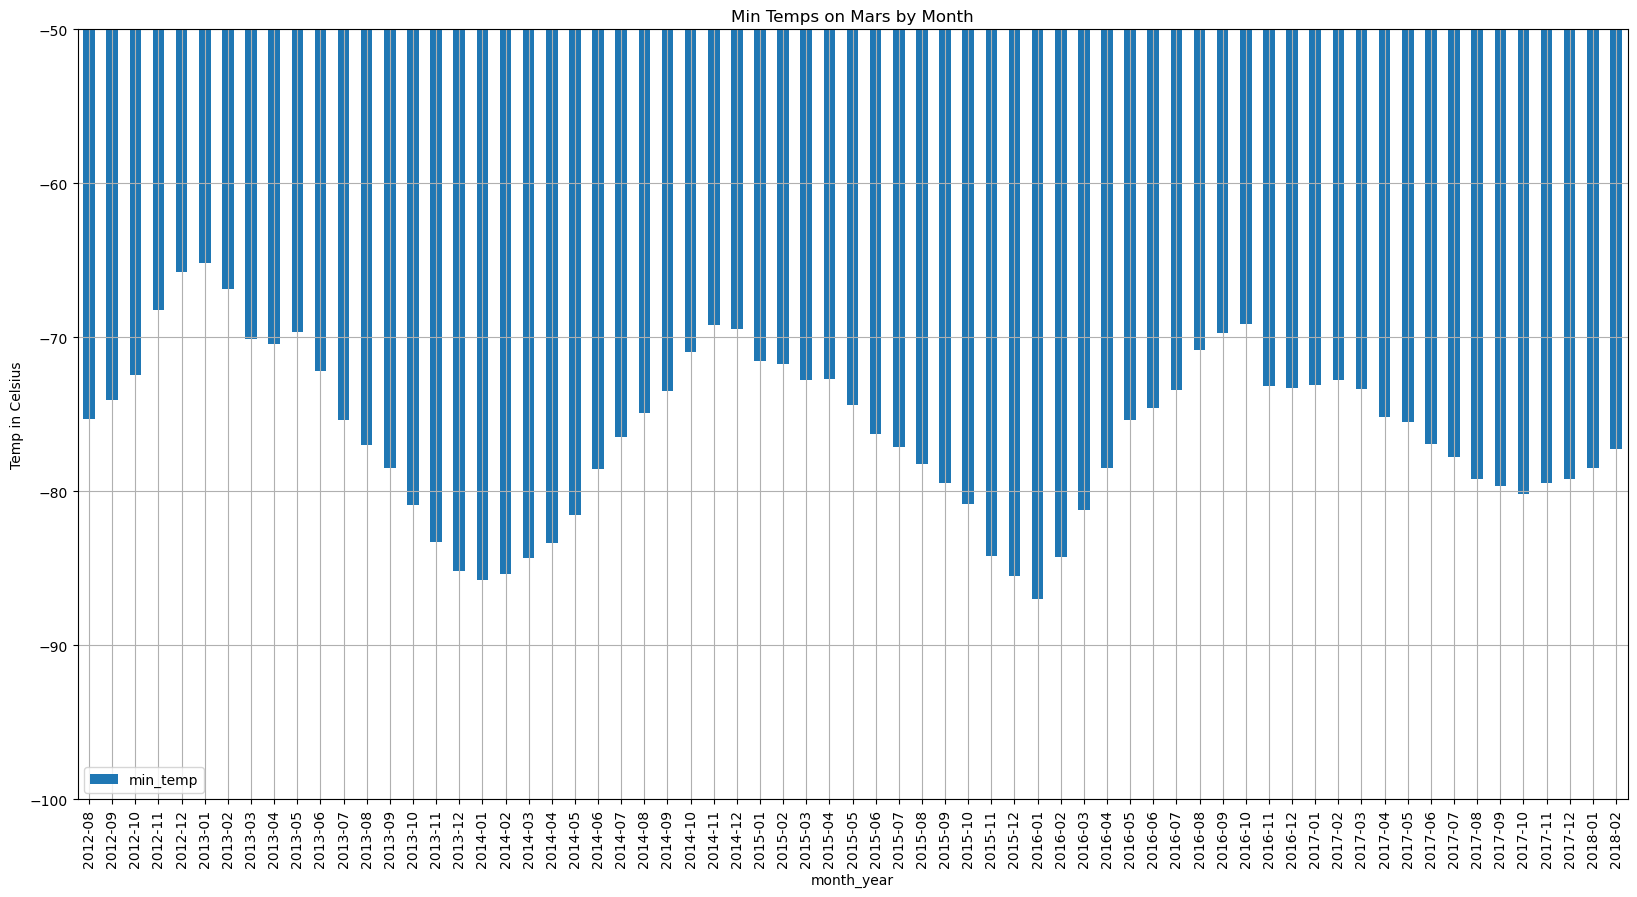

In [12]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?

temp_avg = df.groupby(["month_year"])["min_temp"].mean()

temp_avg_df = pd.DataFrame(temp_avg)

reset = temp_avg_df.reset_index()


# Plot the results as a bar chart.

chart = reset.plot(kind="bar", x="month_year", y="min_temp", rot=90, figsize=(20,10),ylim=(-100,-50), grid=True,title= "Min Temps on Mars by Month")
chart.set_ylabel("Temp in Celsius")


Text(0, 0.5, 'Average Atmospheric Pressue')

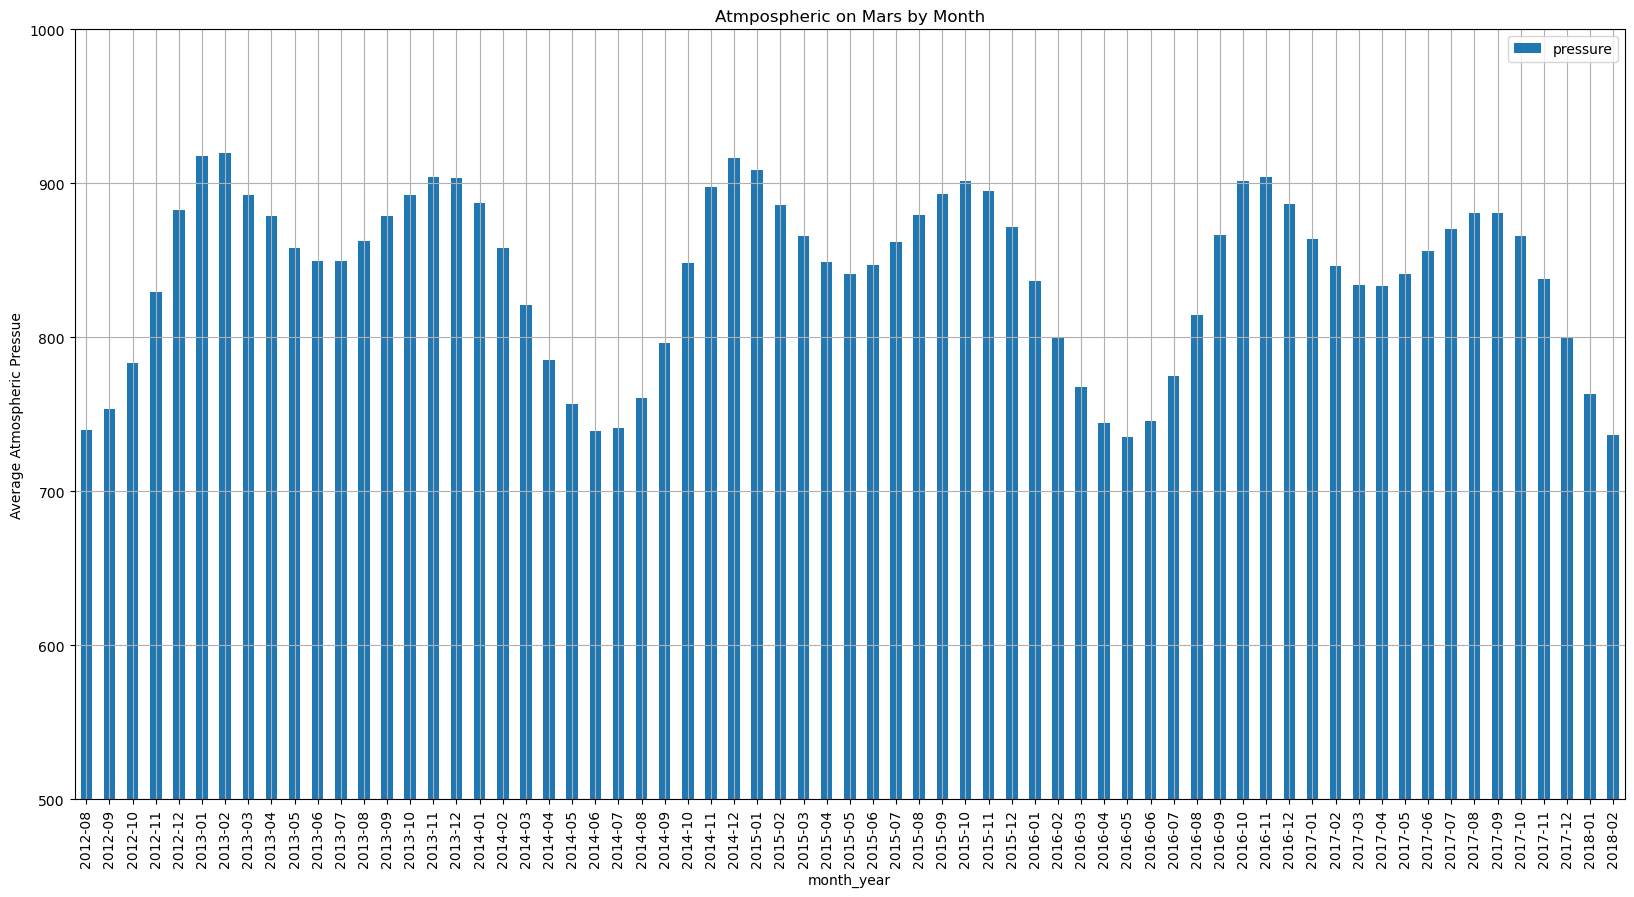

In [20]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

atm_avg = df.groupby(["month_year"])["pressure"].mean()

atm_avg_df = pd.DataFrame(atm_avg)

reset = atm_avg_df.reset_index()

chart = reset.plot(kind="bar", x="month_year", y="pressure", rot=90, figsize=(20,10), ylim=(500,1000), grid=True,title= "Atmpospheric on Mars by Month")
chart.set_ylabel("Average Atmospheric Pressue")


Text(0.5, 0, 'Earth Year')

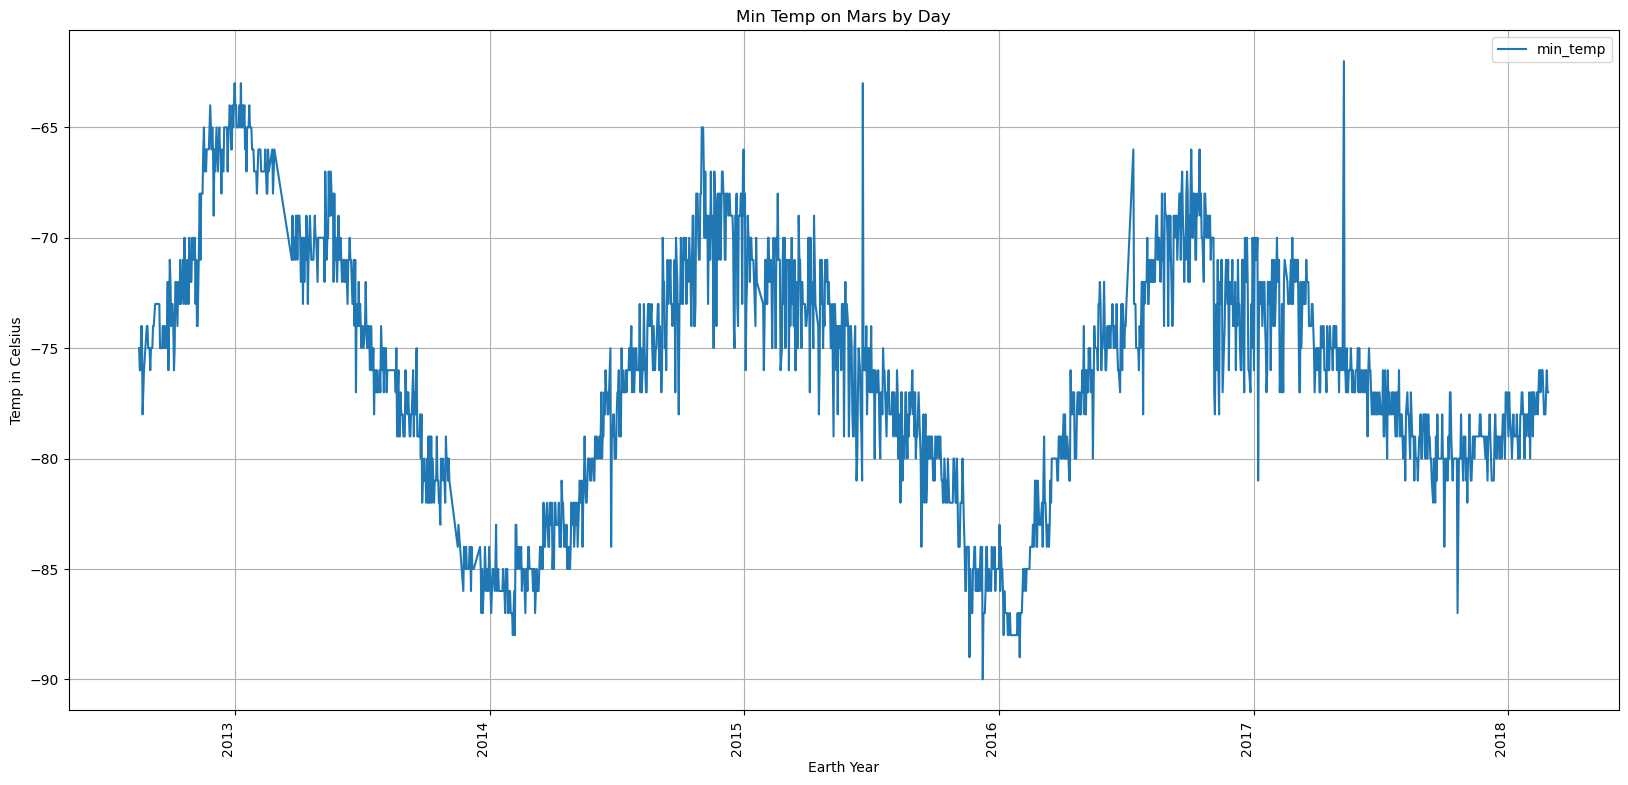

In [21]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature

reduced_df= df[["terrestrial_date","month","min_temp"]]


chart = reduced_df.plot(kind="line", x="terrestrial_date", y="min_temp", rot=90, figsize=(20,10), grid=True,title= "Min Temp on Mars by Day")
chart.set_ylabel("Temp in Celsius")
chart.set_xlabel("Earth Year")


In [22]:
#Export
df.to_csv('MarsData.csv')
